## Import Dataset

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import warnings

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

pd.options.display.max_columns=None # display all columns
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df = df[:100000]

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.11,-83.09,40.11,-83.03,3.23,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.10,36.10,58.00,29.76,10.00,SW,10.40,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.87,-84.06,39.87,-84.05,0.75,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90,NaN,91.00,29.68,10.00,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10,-84.52,39.10,-84.52,0.06,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.00,NaN,97.00,29.70,10.00,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06,-81.54,41.06,-81.54,0.12,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.00,NaN,55.00,29.65,10.00,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17,-84.49,39.17,-84.50,0.50,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.00,29.80,93.00,29.69,10.00,WSW,10.40,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
# !pip install plotly

## Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Severity               100000 non-null  int64  
 2   Start_Time             100000 non-null  object 
 3   End_Time               100000 non-null  object 
 4   Start_Lat              100000 non-null  float64
 5   Start_Lng              100000 non-null  float64
 6   End_Lat                100000 non-null  float64
 7   End_Lng                100000 non-null  float64
 8   Distance(mi)           100000 non-null  float64
 9   Description            100000 non-null  object 
 10  Number                 20843 non-null   float64
 11  Street                 100000 non-null  object 
 12  Side                   100000 non-null  object 
 13  City                   99985 non-null   object 
 14  County                 100000 non-nul

In [6]:
dff = df.copy()

In [7]:
#drop number, street, country, zipcode, airport code, side, street, description, ID, County, State, Timezone
dff.drop(['Number', 'Street', 'Country', 'Zipcode', 'Airport_Code', 'Side', 'Street', 'Description', 'ID'], axis=1, inplace=True)

In [8]:
dff.drop(['County', 'State'], axis=1, inplace=True)

In [9]:
dff.drop(['Timezone', 'City'], axis=1, inplace=True)

In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               100000 non-null  int64  
 1   Start_Time             100000 non-null  object 
 2   End_Time               100000 non-null  object 
 3   Start_Lat              100000 non-null  float64
 4   Start_Lng              100000 non-null  float64
 5   End_Lat                100000 non-null  float64
 6   End_Lng                100000 non-null  float64
 7   Distance(mi)           100000 non-null  float64
 8   Weather_Timestamp      99103 non-null   object 
 9   Temperature(F)         97686 non-null   float64
 10  Wind_Chill(F)          17853 non-null   float64
 11  Humidity(%)            97597 non-null   float64
 12  Pressure(in)           98198 non-null   float64
 13  Visibility(mi)         97382 non-null   float64
 14  Wind_Direction         99091 non-null

In [11]:
# dff[['Start_Lng','End_Lng']].head(20)

In [12]:
dff.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,97686.00,17853.00,97597.00,98198.00,97382.00,83672.00,11519.00
mean,2.46,36.94,-89.53,36.94,-89.53,0.79,63.42,26.90,65.71,30.02,9.38,9.01,0.07
std,0.71,5.01,14.01,5.01,14.01,1.91,20.03,17.75,20.87,0.32,3.23,6.09,0.52
min,2.00,25.13,-123.53,25.13,-123.53,0.00,-20.20,-41.50,4.00,20.41,0.00,0.00,0.00
25%,2.00,33.46,-95.56,33.46,-95.56,0.14,50.90,17.00,50.00,29.92,10.00,5.80,0.00
50%,2.00,38.49,-85.75,38.49,-85.75,0.40,66.90,28.60,67.00,30.03,10.00,8.10,0.01
75%,3.00,41.00,-80.14,41.00,-80.14,0.74,78.80,37.00,83.00,30.14,10.00,11.50,0.04
max,4.00,48.56,-67.85,48.58,-67.85,151.53,129.20,101.00,100.00,30.92,111.00,822.80,10.02


In [13]:
# null_df = pd.DataFrame(dff.isnull().sum().reset_index().values, columns=['variables','count'])
# null_df['percentage_missing'] = null_df['count']/len(dff) * 100
# null_df.sort_values('percentage_missing', ascending=False)

In [14]:
#drop End
dff = dff.drop(['End_Lat','End_Lng'], axis=1)

In [15]:
dff.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.11,-83.09,3.23,2016-02-08 00:53:00,42.10,36.10,58.00,29.76,10.00,SW,10.40,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.87,-84.06,0.75,2016-02-08 05:58:00,36.90,NaN,91.00,29.68,10.00,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10,-84.52,0.06,2016-02-08 05:53:00,36.00,NaN,97.00,29.70,10.00,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06,-81.54,0.12,2016-02-08 06:54:00,39.00,NaN,55.00,29.65,10.00,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17,-84.49,0.50,2016-02-08 07:53:00,37.00,29.80,93.00,29.69,10.00,WSW,10.40,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [16]:
dff.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.00,100000.00,100000.00,100000.00,97686.00,17853.00,97597.00,98198.00,97382.00,83672.00,11519.00
mean,2.46,36.94,-89.53,0.79,63.42,26.90,65.71,30.02,9.38,9.01,0.07
std,0.71,5.01,14.01,1.91,20.03,17.75,20.87,0.32,3.23,6.09,0.52
min,2.00,25.13,-123.53,0.00,-20.20,-41.50,4.00,20.41,0.00,0.00,0.00
25%,2.00,33.46,-95.56,0.14,50.90,17.00,50.00,29.92,10.00,5.80,0.00
50%,2.00,38.49,-85.75,0.40,66.90,28.60,67.00,30.03,10.00,8.10,0.01
75%,3.00,41.00,-80.14,0.74,78.80,37.00,83.00,30.14,10.00,11.50,0.04
max,4.00,48.56,-67.85,151.53,129.20,101.00,100.00,30.92,111.00,822.80,10.02


### Data Visualization

In [17]:
#CITY
#how many cities
# dff.City.nunique()

In [18]:
# #accident number in various cities
# cities_by_accident = dff.City.value_counts()
# cities_by_accident[:30]

In [19]:
# cities_by_accident[-2000:]

In [20]:
#plot first 30 in a bar graph
# cities_by_accident[:30].plot(kind='barh')

In [21]:
#Distance vs Start latitude vs Severity
distance = df['Distance(mi)']
severity = df['Severity']
start = df['Start_Lat']

px.histogram(df,
          x=distance[:50],
          y=start[:50],
          color=severity[:50],
          title='Distance vs Severity'
          )

In [22]:
# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
# g = sns.relplot(
#     data=dff,
#     x="Humidity", y="Severity",
#     hue="Visibility", size="mass",
#     palette=cmap, sizes=(10, 200),
# )
# g.set(xscale="log", yscale="log")
# g.ax.xaxis.grid(True, "minor", linewidth=.25)
# g.ax.yaxis.grid(True, "minor", linewidth=.25)
# g.despine(left=True, bottom=True)

In [23]:
#Temperature & pressure

temperature = df['Temperature(F)']
pressure = df['Pressure(in)']
px.histogram(df, 
           title='Temperature vs Severity',
           x = temperature[:20000],
           #y = pressure[:10000],
           color = severity[:20000])

In [24]:
#Visibilty
visibility = df['Visibility(mi)']
start = df['Start_Lat']
fig = px.histogram(df,
                x=visibility[:200],
                #y=start[:10000],
                color=severity[:200],
                title='Visibility vs Start_Lat')
fig.show()

## Training, Validation and Test Sets

In [25]:
train_val, test_dff = train_test_split(dff, test_size=0.2, random_state=100)
train_dff, val_dff = train_test_split(train_val, test_size=0.3, random_state=100)

In [26]:
print('train_dff.shape: ', train_dff.shape)
print('val_dff.shape: ', val_dff.shape)
print('test_dff.shape: ', test_dff.shape)

train_dff.shape:  (56000, 33)
val_dff.shape:  (24000, 33)
test_dff.shape:  (20000, 33)


In [27]:
train_dff

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
45077,2,2017-01-17 07:16:44,2017-01-17 13:16:44,42.43,-87.83,0.28,2017-01-17 06:55:00,36.00,31.10,100.00,29.80,0.20,WNW,5.80,NaN,Fog,False,False,False,False,False,False,False,False,True,False,False,False,False,Day,Day,Day,Day
42014,2,2017-01-05 18:43:19,2017-01-06 00:43:19,40.63,-74.21,1.25,2017-01-05 18:35:00,31.80,25.40,41.00,29.96,10.00,West,6.90,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
12875,3,2016-12-09 18:35:24,2016-12-10 00:44:01,32.79,-96.81,0.19,2016-12-09 18:53:00,37.90,33.50,47.00,30.53,10.00,East,5.80,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
98358,2,2016-04-22 08:12:44,2016-04-22 14:12:44,41.17,-73.21,1.22,2016-04-22 07:52:00,59.00,NaN,78.00,29.96,10.00,WSW,5.80,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8315,4,2016-05-17 15:35:11,2016-05-17 21:35:11,32.95,-117.10,0.33,2016-05-17 15:53:00,68.00,NaN,63.00,29.92,10.00,Variable,5.80,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95956,2,2016-07-20 05:18:51,2016-07-20 11:18:51,34.97,-114.60,1.01,2016-07-20 04:56:00,93.00,NaN,23.00,29.77,10.00,NW,4.60,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Day,Day,Day
17589,3,2016-10-23 13:09:00,2016-10-23 19:09:00,32.72,-96.92,0.43,2016-10-23 12:53:00,75.90,NaN,52.00,30.14,10.00,South,11.50,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
81269,2,2016-06-24 20:22:47,2016-06-25 02:22:47,38.58,-77.31,1.22,2016-06-24 20:13:00,78.10,NaN,81.00,30.01,10.00,ENE,11.50,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
50389,4,2016-11-01 04:10:46,2016-11-01 10:10:46,36.31,-86.67,1.12,2016-11-01 03:53:00,62.10,NaN,80.00,30.06,10.00,South,4.60,NaN,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [28]:
train_dff['Traffic_Signal'].value_counts()

False    50222
True      5778
Name: Traffic_Signal, dtype: int64

## Inputs and Targets

In [29]:
input_col = list(train_dff.columns)[1:]
input_col

['Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [30]:
target_col = 'Severity'
target_col

'Severity'

In [31]:
#train inputs and targets
train_inputs = train_dff[input_col].copy()
target_input = train_dff[target_col].copy()

#validation inputs and targets
val_inputs = val_dff[input_col].copy()
val_targets =val_dff[target_col].copy()

#test inputs and targets
test_inputs = test_dff[input_col].copy()
test_targets =test_dff[target_col].copy()

In [32]:
val_targets

84988    4
6700     2
65561    2
30953    4
59790    4
        ..
12747    2
57834    3
31264    3
96291    2
93941    2
Name: Severity, Length: 24000, dtype: int64

In [33]:
train_inputs

,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
45077,2017-01-17 07:16:44,2017-01-17 13:16:44,42.43,-87.83,0.28,2017-01-17 06:55:00,36.00,31.10,100.00,29.80,0.20,WNW,5.80,NaN,Fog,False,False,False,False,False,False,False,False,True,False,False,False,False,Day,Day,Day,Day
42014,2017-01-05 18:43:19,2017-01-06 00:43:19,40.63,-74.21,1.25,2017-01-05 18:35:00,31.80,25.40,41.00,29.96,10.00,West,6.90,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
12875,2016-12-09 18:35:24,2016-12-10 00:44:01,32.79,-96.81,0.19,2016-12-09 18:53:00,37.90,33.50,47.00,30.53,10.00,East,5.80,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
98358,2016-04-22 08:12:44,2016-04-22 14:12:44,41.17,-73.21,1.22,2016-04-22 07:52:00,59.00,NaN,78.00,29.96,10.00,WSW,5.80,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8315,2016-05-17 15:35:11,2016-05-17 21:35:11,32.95,-117.10,0.33,2016-05-17 15:53:00,68.00,NaN,63.00,29.92,10.00,Variable,5.80,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95956,2016-07-20 05:18:51,2016-07-20 11:18:51,34.97,-114.60,1.01,2016-07-20 04:56:00,93.00,NaN,23.00,29.77,10.00,NW,4.60,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Day,Day,Day
17589,2016-10-23 13:09:00,2016-10-23 19:09:00,32.72,-96.92,0.43,2016-10-23 12:53:00,75.90,NaN,52.00,30.14,10.00,South,11.50,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
81269,2016-06-24 20:22:47,2016-06-25 02:22:47,38.58,-77.31,1.22,2016-06-24 20:13:00,78.10,NaN,81.00,30.01,10.00,ENE,11.50,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
50389,2016-11-01 04:10:46,2016-11-01 10:10:46,36.31,-86.67,1.12,2016-11-01 03:53:00,62.10,NaN,80.00,30.06,10.00,South,4.60,NaN,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [34]:
#numerical and categorical columns

num_cols = train_inputs.select_dtypes(np.number).columns.tolist()
cat_cols = train_inputs.select_dtypes('object').columns.tolist()

In [35]:
num_cols

['Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [36]:
cat_cols

['Start_Time',
 'End_Time',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [37]:
train_inputs[num_cols].describe()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,56000.00,56000.00,56000.00,54674.00,9894.00,54626.00,54992.00,54530.00,46759.00,6433.00
mean,36.96,-89.50,0.79,63.47,26.82,65.76,30.02,9.36,9.05,0.06
std,5.01,14.04,1.87,20.02,17.71,20.82,0.31,3.22,7.04,0.46
min,25.13,-123.28,0.00,-20.20,-34.70,4.00,20.41,0.00,0.00,0.00
25%,33.46,-95.56,0.15,51.10,16.90,51.00,29.92,10.00,5.80,0.00
50%,38.50,-85.69,0.41,66.90,28.60,67.00,30.03,10.00,8.10,0.01
75%,41.00,-80.11,0.74,78.80,36.88,83.00,30.14,10.00,11.50,0.03
max,48.56,-67.85,151.53,129.20,101.00,100.00,30.92,111.00,822.80,10.00


In [38]:
train_inputs[cat_cols].nunique()

Start_Time               50049
End_Time                 50124
Weather_Timestamp        29059
Wind_Direction              24
Weather_Condition           51
Sunrise_Sunset               2
Civil_Twilight               2
Nautical_Twilight            2
Astronomical_Twilight        2
dtype: int64

## Imputing Missing Values

In [39]:
imputer = SimpleImputer(strategy= 'mean')

In [40]:
#check the number of missing values
dff[num_cols].isna().sum()

Start_Lat                0
Start_Lng                0
Distance(mi)             0
Temperature(F)        2314
Wind_Chill(F)        82147
Humidity(%)           2403
Pressure(in)          1802
Visibility(mi)        2618
Wind_Speed(mph)      16328
Precipitation(in)    88481
dtype: int64

In [41]:
#fit imputer to data
imputer.fit(dff[num_cols])

SimpleImputer()

In [42]:
#averages for the numeric columns for the whole dataset
list(imputer.statistics_)

[36.94250093849,
 -89.5264251543,
 0.7949740199999998,
 63.42392359191695,
 26.901215481991823,
 65.70615900078896,
 30.023455060184524,
 9.378674703744018,
 9.0140070752462,
 0.06992968139595451]

In [43]:
#fitting averages to the train, validation, and test sets

train_inputs[num_cols] = imputer.transform(train_inputs[num_cols])
val_inputs[num_cols] = imputer.transform(val_inputs[num_cols])
test_inputs[num_cols] = imputer.transform(test_inputs[num_cols])

In [44]:
train_inputs[num_cols].isna().sum()

Start_Lat            0
Start_Lng            0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64

## Scaling the numeric features

In [45]:
dff[num_cols].describe()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.00,100000.00,100000.00,97686.00,17853.00,97597.00,98198.00,97382.00,83672.00,11519.00
mean,36.94,-89.53,0.79,63.42,26.90,65.71,30.02,9.38,9.01,0.07
std,5.01,14.01,1.91,20.03,17.75,20.87,0.32,3.23,6.09,0.52
min,25.13,-123.53,0.00,-20.20,-41.50,4.00,20.41,0.00,0.00,0.00
25%,33.46,-95.56,0.14,50.90,17.00,50.00,29.92,10.00,5.80,0.00
50%,38.49,-85.75,0.40,66.90,28.60,67.00,30.03,10.00,8.10,0.01
75%,41.00,-80.14,0.74,78.80,37.00,83.00,30.14,10.00,11.50,0.04
max,48.56,-67.85,151.53,129.20,101.00,100.00,30.92,111.00,822.80,10.02


In [46]:
scaler = MinMaxScaler()

In [47]:
scaler.fit(dff[num_cols])

MinMaxScaler()

In [48]:
#scale the train, val, and test sets

train_inputs[num_cols] = scaler.transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.transform(test_inputs[num_cols])

In [49]:
#check whether scaled

train_inputs[num_cols].describe()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,56000.00,56000.00,56000.00,56000.00,56000.00,56000.00,56000.00,56000.00,56000.00,56000.00
mean,0.50,0.61,0.01,0.56,0.48,0.64,0.91,0.08,0.01,0.01
std,0.21,0.25,0.01,0.13,0.05,0.21,0.03,0.03,0.01,0.02
min,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.50,0.00,0.48,0.48,0.49,0.90,0.09,0.01,0.01
50%,0.57,0.68,0.00,0.58,0.48,0.65,0.91,0.09,0.01,0.01
75%,0.68,0.78,0.00,0.66,0.48,0.82,0.93,0.09,0.01,0.01
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [50]:
# Categorical Columns
cat_cols

['Start_Time',
 'End_Time',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [51]:
train_inputs['Weather_Timestamp'].head()
# extract year, month, time of day, day of week

45077    2017-01-17 06:55:00
42014    2017-01-05 18:35:00
12875    2016-12-09 18:53:00
98358    2016-04-22 07:52:00
8315     2016-05-17 15:53:00
Name: Weather_Timestamp, dtype: object

In [52]:
# extract year
train_inputs['Weather_Timestamp'] = pd.to_datetime(train_inputs['Weather_Timestamp'])
train_inputs['Start_Time'] = pd.to_datetime(train_inputs['Start_Time'])
train_inputs['End_Time'] = pd.to_datetime(train_inputs['End_Time'])

train_inputs['Weather_Timestamp_Year'] = train_inputs['Weather_Timestamp'].dt.strftime("%Y")
train_inputs['Start_Time_Year'] = train_inputs['Start_Time'].dt.strftime("%Y")
train_inputs['End_Time_Year'] = train_inputs['End_Time'].dt.strftime("%Y")

train_inputs['Weather_Timestamp_Month'] = train_inputs['Weather_Timestamp'].dt.strftime("%B")
train_inputs['Start_Time_Month'] = train_inputs['Start_Time'].dt.strftime("%B")
train_inputs['End_Time_Month'] = train_inputs['End_Time'].dt.strftime("%B")

train_inputs['Weather_Timestamp_Day'] = train_inputs['Weather_Timestamp'].dt.day_name()
train_inputs['Start_Time_Day'] = train_inputs['Start_Time'].dt.day_name()
train_inputs['End_Time_Day'] = train_inputs['End_Time'].dt.day_name()

train_inputs.head()

,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Timestamp_Year,Start_Time_Year,End_Time_Year,Weather_Timestamp_Month,Start_Time_Month,End_Time_Month,Weather_Timestamp_Day,Start_Time_Day,End_Time_Day
45077,2017-01-17 07:16:44,2017-01-17 13:16:44,0.74,0.64,0.00,2017-01-17 06:55:00,0.38,0.51,1.00,0.89,0.00,WNW,0.01,0.01,Fog,False,False,False,False,False,False,False,False,True,False,False,False,False,Day,Day,Day,Day,2017,2017,2017,January,January,January,Tuesday,Tuesday,Tuesday
42014,2017-01-05 18:43:19,2017-01-06 00:43:19,0.66,0.89,0.01,2017-01-05 18:35:00,0.35,0.47,0.39,0.91,0.09,West,0.01,0.01,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2017,2017,2017,January,January,January,Thursday,Thursday,Friday
12875,2016-12-09 18:35:24,2016-12-10 00:44:01,0.33,0.48,0.00,2016-12-09 18:53:00,0.39,0.53,0.45,0.96,0.09,East,0.01,0.01,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2016,2016,December,December,December,Friday,Friday,Saturday
98358,2016-04-22 08:12:44,2016-04-22 14:12:44,0.68,0.90,0.01,2016-04-22 07:52:00,0.53,0.48,0.77,0.91,0.09,WSW,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,April,April,April,Friday,Friday,Friday
8315,2016-05-17 15:35:11,2016-05-17 21:35:11,0.33,0.12,0.00,2016-05-17 15:53:00,0.59,0.48,0.61,0.90,0.09,Variable,0.01,0.01,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,May,May,May,Tuesday,Tuesday,Tuesday


In [53]:
val_inputs['Weather_Timestamp'] = pd.to_datetime(val_inputs['Weather_Timestamp'])
val_inputs['Start_Time'] = pd.to_datetime(val_inputs['Start_Time'])
val_inputs['End_Time'] = pd.to_datetime(val_inputs['End_Time'])

val_inputs['Weather_Timestamp_Year'] = val_inputs['Weather_Timestamp'].dt.strftime("%Y")
val_inputs['Start_Time_Year'] = val_inputs['Start_Time'].dt.strftime("%Y")
val_inputs['End_Time_Year'] = val_inputs['End_Time'].dt.strftime("%Y")

val_inputs['Weather_Timestamp_Month'] = val_inputs['Weather_Timestamp'].dt.strftime("%B")
val_inputs['Start_Time_Month'] = val_inputs['Start_Time'].dt.strftime("%B")
val_inputs['End_Time_Month'] = val_inputs['End_Time'].dt.strftime("%B")

val_inputs['Weather_Timestamp_Day'] = val_inputs['Weather_Timestamp'].dt.day_name()
val_inputs['Start_Time_Day'] = val_inputs['Start_Time'].dt.day_name()
val_inputs['End_Time_Day'] = val_inputs['End_Time'].dt.day_name()

val_inputs.head()

,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Timestamp_Year,Start_Time_Year,End_Time_Year,Weather_Timestamp_Month,Start_Time_Month,End_Time_Month,Weather_Timestamp_Day,Start_Time_Day,End_Time_Day
84988,2016-07-09 11:52:49,2016-07-09 17:52:49,0.37,0.80,0.00,2016-07-09 11:55:00,0.72,0.48,0.56,0.91,0.06,Calm,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,July,July,July,Saturday,Saturday,Saturday
6700,2016-04-18 03:52:52,2016-04-18 09:52:52,0.36,0.11,0.00,2016-04-18 03:53:00,0.54,0.48,0.44,0.91,0.09,Calm,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2016,2016,April,April,April,Monday,Monday,Monday
65561,2016-10-11 17:00:10,2016-10-11 23:00:10,0.62,0.87,0.00,2016-10-11 16:54:00,0.56,0.48,0.35,0.95,0.09,Calm,0.01,0.01,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,October,October,October,Tuesday,Tuesday,Tuesday
30953,2016-07-25 07:13:45,2016-07-25 13:13:45,0.22,0.46,0.00,2016-07-25 06:51:00,0.67,0.48,0.84,0.91,0.09,Calm,0.01,0.01,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,July,July,July,Monday,Monday,Monday
59790,2016-09-13 23:23:55,2016-09-14 05:23:55,0.56,0.64,0.05,2016-09-13 22:54:00,0.60,0.48,0.86,0.92,0.09,Calm,0.01,0.01,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2016,2016,September,September,September,Tuesday,Tuesday,Wednesday


In [54]:
test_inputs['Weather_Timestamp'] = pd.to_datetime(test_inputs['Weather_Timestamp'])
test_inputs['Start_Time'] = pd.to_datetime(test_inputs['Start_Time'])
test_inputs['End_Time'] = pd.to_datetime(test_inputs['End_Time'])

test_inputs['Weather_Timestamp_Year'] = test_inputs['Weather_Timestamp'].dt.strftime("%Y")
test_inputs['Start_Time_Year'] = test_inputs['Start_Time'].dt.strftime("%Y")
test_inputs['End_Time_Year'] = test_inputs['End_Time'].dt.strftime("%Y")

test_inputs['Weather_Timestamp_Month'] = test_inputs['Weather_Timestamp'].dt.strftime("%B")
test_inputs['Start_Time_Month'] = test_inputs['Start_Time'].dt.strftime("%B")
test_inputs['End_Time_Month'] = test_inputs['End_Time'].dt.strftime("%B")

test_inputs['Weather_Timestamp_Day'] = test_inputs['Weather_Timestamp'].dt.day_name()
test_inputs['Start_Time_Day'] = test_inputs['Start_Time'].dt.day_name()
test_inputs['End_Time_Day'] = test_inputs['End_Time'].dt.day_name()

test_inputs.head()

,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Timestamp_Year,Start_Time_Year,End_Time_Year,Weather_Timestamp_Month,Start_Time_Month,End_Time_Month,Weather_Timestamp_Day,Start_Time_Day,End_Time_Day
22422,2016-10-01 07:03:15,2016-10-01 13:03:15,0.59,0.54,0.00,2016-10-01 06:58:00,0.50,0.48,1.00,0.92,0.09,Calm,0.01,0.01,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016,2016,2016,October,October,October,Saturday,Saturday,Saturday
25747,2016-08-17 05:52:06,2016-08-17 11:52:06,0.22,0.46,0.00,2016-08-17 05:51:00,0.64,0.48,1.00,0.92,0.05,Calm,0.01,0.00,Light Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2016,2016,August,August,August,Wednesday,Wednesday,Wednesday
13795,2016-12-19 07:06:40,2016-12-19 13:06:40,0.32,0.47,0.00,2016-12-19 06:53:00,0.24,0.34,0.57,0.98,0.09,NNW,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016,2016,2016,December,December,December,Monday,Monday,Monday
68724,2016-08-03 00:27:29,2016-08-03 06:27:29,0.63,0.81,0.00,2016-08-03 00:35:00,0.61,0.48,0.80,0.92,0.09,Calm,0.01,0.01,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2016,2016,August,August,August,Wednesday,Wednesday,Wednesday
38923,2016-12-22 09:20:48,2016-12-22 15:20:48,0.37,0.70,0.00,2016-12-22 08:52:00,0.49,0.48,0.65,0.94,0.09,West,0.01,0.01,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,December,December,December,Thursday,Thursday,Thursday


In [55]:
conditions = [
    (train_inputs['Weather_Timestamp'].dt.hour >= 4) & (train_inputs['Weather_Timestamp'].dt.hour < 12),
    (train_inputs['Weather_Timestamp'].dt.hour >= 12) & (train_inputs['Weather_Timestamp'].dt.hour < 17),
    (train_inputs['Weather_Timestamp'].dt.hour >= 17) & (train_inputs['Weather_Timestamp'].dt.hour < 21),
    (train_inputs['Weather_Timestamp'].dt.hour >= 21) | (train_inputs['Weather_Timestamp'].dt.hour < 4)
]
values = ['Morning', 'Afternoon', 'Evening', 'Night']
train_inputs['Weather_Timestamp_Time_Day'] = pd.DataFrame(np.select(conditions, values))

In [56]:
conditions = [
    (val_inputs['Weather_Timestamp'].dt.hour >= 4) & (val_inputs['Weather_Timestamp'].dt.hour < 12),
    (val_inputs['Weather_Timestamp'].dt.hour >= 12) & (val_inputs['Weather_Timestamp'].dt.hour < 17),
    (val_inputs['Weather_Timestamp'].dt.hour >= 17) & (val_inputs['Weather_Timestamp'].dt.hour < 21),
    (val_inputs['Weather_Timestamp'].dt.hour >= 21) | (val_inputs['Weather_Timestamp'].dt.hour < 4)
]
values = ['Morning', 'Afternoon', 'Evening', 'Night']
val_inputs['Weather_Timestamp_Time_Day'] = pd.DataFrame(np.select(conditions, values))

In [57]:
conditions = [
    (test_inputs['Weather_Timestamp'].dt.hour >= 4) & (test_inputs['Weather_Timestamp'].dt.hour < 12),
    (test_inputs['Weather_Timestamp'].dt.hour >= 12) & (test_inputs['Weather_Timestamp'].dt.hour < 17),
    (test_inputs['Weather_Timestamp'].dt.hour >= 17) & (test_inputs['Weather_Timestamp'].dt.hour < 21),
    (test_inputs['Weather_Timestamp'].dt.hour >= 21) | (test_inputs['Weather_Timestamp'].dt.hour < 4)
]
values = ['Morning', 'Afternoon', 'Evening', 'Night']
test_inputs['Weather_Timestamp_Time_Day'] = pd.DataFrame(np.select(conditions, values))

In [58]:
conditions = [
    (train_inputs['Start_Time'].dt.hour >= 4) & (train_inputs['Start_Time'].dt.hour < 12),
    (train_inputs['Start_Time'].dt.hour >= 12) & (train_inputs['Start_Time'].dt.hour < 17),
    (train_inputs['Start_Time'].dt.hour >= 17) & (train_inputs['Start_Time'].dt.hour < 21),
    (train_inputs['Start_Time'].dt.hour >= 21) | (train_inputs['Start_Time'].dt.hour < 4)
]
values = ['Morning', 'Afternoon', 'Evening', 'Night']
train_inputs['Start_Time_Time_Day'] = pd.DataFrame(np.select(conditions, values))

In [59]:
conditions = [
    (val_inputs['Start_Time'].dt.hour >= 4) & (val_inputs['Start_Time'].dt.hour < 12),
    (val_inputs['Start_Time'].dt.hour >= 12) & (val_inputs['Start_Time'].dt.hour < 17),
    (val_inputs['Start_Time'].dt.hour >= 17) & (val_inputs['Start_Time'].dt.hour < 21),
    (val_inputs['Start_Time'].dt.hour >= 21) | (val_inputs['Start_Time'].dt.hour < 4)
]
values = ['Morning', 'Afternoon', 'Evening', 'Night']
val_inputs['Start_Time_Time_Day'] = pd.DataFrame(np.select(conditions, values))

In [60]:
conditions = [
    (test_inputs['Start_Time'].dt.hour >= 4) & (test_inputs['Start_Time'].dt.hour < 12),
    (test_inputs['Start_Time'].dt.hour >= 12) & (test_inputs['Start_Time'].dt.hour < 17),
    (test_inputs['Start_Time'].dt.hour >= 17) & (test_inputs['Start_Time'].dt.hour < 21),
    (test_inputs['Start_Time'].dt.hour >= 21) | (test_inputs['Start_Time'].dt.hour < 4)
]
values = ['Morning', 'Afternoon', 'Evening', 'Night']
test_inputs['Start_Time_Time_Day'] = pd.DataFrame(np.select(conditions, values))

In [61]:
conditions = [
    (train_inputs['End_Time'].dt.hour >= 4) & (train_inputs['End_Time'].dt.hour < 12),
    (train_inputs['End_Time'].dt.hour >= 12) & (train_inputs['End_Time'].dt.hour < 17),
    (train_inputs['End_Time'].dt.hour >= 17) & (train_inputs['End_Time'].dt.hour < 21),
    (train_inputs['End_Time'].dt.hour >= 21) | (train_inputs['End_Time'].dt.hour < 4)
]
values = ['Morning', 'Afternoon', 'Evening', 'Night']
train_inputs['End_Time_Time_Day'] = pd.DataFrame(np.select(conditions, values))

In [62]:
conditions = [
    (val_inputs['End_Time'].dt.hour >= 4) & (val_inputs['End_Time'].dt.hour < 12),
    (val_inputs['End_Time'].dt.hour >= 12) & (val_inputs['End_Time'].dt.hour < 17),
    (val_inputs['End_Time'].dt.hour >= 17) & (val_inputs['End_Time'].dt.hour < 21),
    (val_inputs['End_Time'].dt.hour >= 21) | (val_inputs['End_Time'].dt.hour < 4)
]
values = ['Morning', 'Afternoon', 'Evening', 'Night']
val_inputs['End_Time_Time_Day'] = pd.DataFrame(np.select(conditions, values))

In [63]:
conditions = [
    (test_inputs['End_Time'].dt.hour >= 4) & (test_inputs['End_Time'].dt.hour < 12),
    (test_inputs['End_Time'].dt.hour >= 12) & (test_inputs['End_Time'].dt.hour < 17),
    (test_inputs['End_Time'].dt.hour >= 17) & (test_inputs['End_Time'].dt.hour < 21),
    (test_inputs['End_Time'].dt.hour >= 21) | (test_inputs['End_Time'].dt.hour < 4)
]
values = ['Morning', 'Afternoon', 'Evening', 'Night']
test_inputs['End_Time_Time_Day'] = pd.DataFrame(np.select(conditions, values))

In [64]:
train_inputs.head()

,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Timestamp_Year,Start_Time_Year,End_Time_Year,Weather_Timestamp_Month,Start_Time_Month,End_Time_Month,Weather_Timestamp_Day,Start_Time_Day,End_Time_Day,Weather_Timestamp_Time_Day,Start_Time_Time_Day,End_Time_Time_Day
45077,2017-01-17 07:16:44,2017-01-17 13:16:44,0.74,0.64,0.00,2017-01-17 06:55:00,0.38,0.51,1.00,0.89,0.00,WNW,0.01,0.01,Fog,False,False,False,False,False,False,False,False,True,False,False,False,False,Day,Day,Day,Day,2017,2017,2017,January,January,January,Tuesday,Tuesday,Tuesday,Morning,Morning,Afternoon
42014,2017-01-05 18:43:19,2017-01-06 00:43:19,0.66,0.89,0.01,2017-01-05 18:35:00,0.35,0.47,0.39,0.91,0.09,West,0.01,0.01,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2017,2017,2017,January,January,January,Thursday,Thursday,Friday,Morning,Morning,Afternoon
12875,2016-12-09 18:35:24,2016-12-10 00:44:01,0.33,0.48,0.00,2016-12-09 18:53:00,0.39,0.53,0.45,0.96,0.09,East,0.01,0.01,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2016,2016,December,December,December,Friday,Friday,Saturday,Morning,Morning,Afternoon
98358,2016-04-22 08:12:44,2016-04-22 14:12:44,0.68,0.90,0.01,2016-04-22 07:52:00,0.53,0.48,0.77,0.91,0.09,WSW,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,April,April,April,Friday,Friday,Friday,NaN,NaN,NaN
8315,2016-05-17 15:35:11,2016-05-17 21:35:11,0.33,0.12,0.00,2016-05-17 15:53:00,0.59,0.48,0.61,0.90,0.09,Variable,0.01,0.01,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,May,May,May,Tuesday,Tuesday,Tuesday,Afternoon,Afternoon,Evening


In [65]:
train_inputs.tail()

,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Timestamp_Year,Start_Time_Year,End_Time_Year,Weather_Timestamp_Month,Start_Time_Month,End_Time_Month,Weather_Timestamp_Day,Start_Time_Day,End_Time_Day,Weather_Timestamp_Time_Day,Start_Time_Time_Day,End_Time_Time_Day
95956,2016-07-20 05:18:51,2016-07-20 11:18:51,0.42,0.16,0.01,2016-07-20 04:56:00,0.76,0.48,0.20,0.89,0.09,NW,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Day,Day,Day,2016,2016,2016,July,July,July,Wednesday,Wednesday,Wednesday,NaN,NaN,NaN
17589,2016-10-23 13:09:00,2016-10-23 19:09:00,0.32,0.48,0.00,2016-10-23 12:53:00,0.64,0.48,0.50,0.93,0.09,South,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,October,October,October,Sunday,Sunday,Sunday,Morning,Morning,Morning
81269,2016-06-24 20:22:47,2016-06-25 02:22:47,0.57,0.83,0.01,2016-06-24 20:13:00,0.66,0.48,0.80,0.91,0.09,ENE,0.01,0.01,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,June,June,June,Friday,Friday,Saturday,NaN,NaN,NaN
50389,2016-11-01 04:10:46,2016-11-01 10:10:46,0.48,0.66,0.01,2016-11-01 03:53:00,0.55,0.48,0.79,0.92,0.09,South,0.01,0.01,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2016,2016,November,November,November,Tuesday,Tuesday,Tuesday,Afternoon,Afternoon,Evening
24040,2016-10-18 19:10:23,2016-10-19 01:10:23,0.20,0.50,0.00,2016-10-18 18:53:00,0.68,0.48,0.68,0.90,0.09,SSE,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016,2016,2016,October,October,October,Tuesday,Tuesday,Wednesday,Morning,Morning,Afternoon


In [66]:
train_inputs.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1, inplace=True)

In [67]:
cat_cols = train_inputs.select_dtypes(['object','datetime']).columns.tolist()

In [68]:
cat_cols

['Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Weather_Timestamp_Year',
 'Start_Time_Year',
 'End_Time_Year',
 'Weather_Timestamp_Month',
 'Start_Time_Month',
 'End_Time_Month',
 'Weather_Timestamp_Day',
 'Start_Time_Day',
 'End_Time_Day',
 'Weather_Timestamp_Time_Day',
 'Start_Time_Time_Day',
 'End_Time_Time_Day']

In [69]:
for col in cat_cols:
    print(col,train_inputs[col].nunique())

Wind_Direction 24
Weather_Condition 51
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2
Weather_Timestamp_Year 2
Start_Time_Year 2
End_Time_Year 3
Weather_Timestamp_Month 12
Start_Time_Month 12
End_Time_Month 12
Weather_Timestamp_Day 7
Start_Time_Day 7
End_Time_Day 7
Weather_Timestamp_Time_Day 5
Start_Time_Time_Day 4
End_Time_Time_Day 4


In [70]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 45077 to 24040
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Start_Lat                   56000 non-null  float64
 1   Start_Lng                   56000 non-null  float64
 2   Distance(mi)                56000 non-null  float64
 3   Temperature(F)              56000 non-null  float64
 4   Wind_Chill(F)               56000 non-null  float64
 5   Humidity(%)                 56000 non-null  float64
 6   Pressure(in)                56000 non-null  float64
 7   Visibility(mi)              56000 non-null  float64
 8   Wind_Direction              55500 non-null  object 
 9   Wind_Speed(mph)             56000 non-null  float64
 10  Precipitation(in)           56000 non-null  float64
 11  Weather_Condition           54563 non-null  object 
 12  Amenity                     56000 non-null  bool   
 13  Bump                       

In [71]:
# # drop the City
# dff = dff.drop('City', axis=1)

In [72]:
train_inputs

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Timestamp_Year,Start_Time_Year,End_Time_Year,Weather_Timestamp_Month,Start_Time_Month,End_Time_Month,Weather_Timestamp_Day,Start_Time_Day,End_Time_Day,Weather_Timestamp_Time_Day,Start_Time_Time_Day,End_Time_Time_Day
45077,0.74,0.64,0.00,0.38,0.51,1.00,0.89,0.00,WNW,0.01,0.01,Fog,False,False,False,False,False,False,False,False,True,False,False,False,False,Day,Day,Day,Day,2017,2017,2017,January,January,January,Tuesday,Tuesday,Tuesday,Morning,Morning,Afternoon
42014,0.66,0.89,0.01,0.35,0.47,0.39,0.91,0.09,West,0.01,0.01,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2017,2017,2017,January,January,January,Thursday,Thursday,Friday,Morning,Morning,Afternoon
12875,0.33,0.48,0.00,0.39,0.53,0.45,0.96,0.09,East,0.01,0.01,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2016,2016,December,December,December,Friday,Friday,Saturday,Morning,Morning,Afternoon
98358,0.68,0.90,0.01,0.53,0.48,0.77,0.91,0.09,WSW,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,April,April,April,Friday,Friday,Friday,NaN,NaN,NaN
8315,0.33,0.12,0.00,0.59,0.48,0.61,0.90,0.09,Variable,0.01,0.01,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,May,May,May,Tuesday,Tuesday,Tuesday,Afternoon,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95956,0.42,0.16,0.01,0.76,0.48,0.20,0.89,0.09,NW,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Day,Day,Day,2016,2016,2016,July,July,July,Wednesday,Wednesday,Wednesday,NaN,NaN,NaN
17589,0.32,0.48,0.00,0.64,0.48,0.50,0.93,0.09,South,0.01,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,October,October,October,Sunday,Sunday,Sunday,Morning,Morning,Morning
81269,0.57,0.83,0.01,0.66,0.48,0.80,0.91,0.09,ENE,0.01,0.01,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016,2016,June,June,June,Friday,Friday,Saturday,NaN,NaN,NaN
50389,0.48,0.66,0.01,0.55,0.48,0.79,0.92,0.09,South,0.01,0.01,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2016,2016,November,November,November,Tuesday,Tuesday,Tuesday,Afternoon,Afternoon,Evening


In [73]:
train_inputs.isna().sum()

Start_Lat                         0
Start_Lng                         0
Distance(mi)                      0
Temperature(F)                    0
Wind_Chill(F)                     0
Humidity(%)                       0
Pressure(in)                      0
Visibility(mi)                    0
Wind_Direction                  500
Wind_Speed(mph)                   0
Precipitation(in)                 0
Weather_Condition              1437
Amenity                           0
Bump                              0
Crossing                          0
Give_Way                          0
Junction                          0
No_Exit                           0
Railway                           0
Roundabout                        0
Station                           0
Stop                              0
Traffic_Calming                   0
Traffic_Signal                    0
Turning_Loop                      0
Sunrise_Sunset                    7
Civil_Twilight                    7
Nautical_Twilight           

## OptBinning

In [74]:
# !pip install optbinning

In [75]:
#!pip install protobuf --upgrade

In [76]:
#from google.protobuf.internal import builder

In [77]:
# from optbinning import OptimalBinning

In [78]:

# # variable = "Weather_"
# x = train_inputs[variable].values
# y = target_input.values

# optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")

# optb.fit(x, y)

In [79]:
# optb.status

In [80]:
# optb.splits

In [81]:
# binning_table = optb.binning_table
# binning_table.build()

## Encode Categorical Variables

In [82]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [83]:
#fit the data
encoder.fit(train_inputs[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [84]:
#categories
encoder.categories_

[array(['CALM', 'Calm', 'E', 'ENE', 'ESE', 'East', 'N', 'NE', 'NNE', 'NNW',
        'NW', 'North', 'S', 'SE', 'SSE', 'SSW', 'SW', 'South', 'VAR',
        'Variable', 'W', 'WNW', 'WSW', 'West', nan], dtype=object),
 array(['Blowing Snow', 'Clear', 'Cloudy', 'Drizzle', 'Fair',
        'Fair / Windy', 'Fog', 'Haze', 'Heavy Drizzle', 'Heavy Rain',
        'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain',
        'Heavy Thunderstorms and Snow', 'Ice Pellets', 'Light Drizzle',
        'Light Fog', 'Light Freezing Drizzle', 'Light Freezing Fog',
        'Light Freezing Rain', 'Light Ice Pellets', 'Light Rain',
        'Light Rain Showers', 'Light Rain with Thunder', 'Light Snow',
        'Light Snow Showers', 'Light Thunderstorms and Rain',
        'Light Thunderstorms and Snow', 'Mist', 'Mostly Cloudy',
        'N/A Precipitation', 'Overcast', 'Partly Cloudy',
        'Partly Cloudy / Windy', 'Patches of Fog', 'Rain', 'Rain Showers',
        'Sand', 'Scattered Clouds', 'Shallow 

In [85]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
print(encoded_cols)

['Wind_Direction_CALM', 'Wind_Direction_Calm', 'Wind_Direction_E', 'Wind_Direction_ENE', 'Wind_Direction_ESE', 'Wind_Direction_East', 'Wind_Direction_N', 'Wind_Direction_NE', 'Wind_Direction_NNE', 'Wind_Direction_NNW', 'Wind_Direction_NW', 'Wind_Direction_North', 'Wind_Direction_S', 'Wind_Direction_SE', 'Wind_Direction_SSE', 'Wind_Direction_SSW', 'Wind_Direction_SW', 'Wind_Direction_South', 'Wind_Direction_VAR', 'Wind_Direction_Variable', 'Wind_Direction_W', 'Wind_Direction_WNW', 'Wind_Direction_WSW', 'Wind_Direction_West', 'Wind_Direction_nan', 'Weather_Condition_Blowing Snow', 'Weather_Condition_Clear', 'Weather_Condition_Cloudy', 'Weather_Condition_Drizzle', 'Weather_Condition_Fair', 'Weather_Condition_Fair / Windy', 'Weather_Condition_Fog', 'Weather_Condition_Haze', 'Weather_Condition_Heavy Drizzle', 'Weather_Condition_Heavy Rain', 'Weather_Condition_Heavy Snow', 'Weather_Condition_Heavy T-Storm', 'Weather_Condition_Heavy Thunderstorms and Rain', 'Weather_Condition_Heavy Thundersto

In [86]:
train_inputs[encoded_cols]= encoder.transform(train_inputs[cat_cols])
val_inputs[encoded_cols]= encoder.transform(val_inputs[cat_cols])
test_inputs[encoded_cols]= encoder.transform(test_inputs[cat_cols])

In [87]:
train_inputs

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Timestamp_Year,Start_Time_Year,End_Time_Year,Weather_Timestamp_Month,Start_Time_Month,End_Time_Month,Weather_Timestamp_Day,Start_Time_Day,End_Time_Day,Weather_Timestamp_Time_Day,Start_Time_Time_Day,End_Time_Time_Day,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Wind_Direction_nan,Weather_Condition_Blowing Snow,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Drizzle,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Haze,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Snow,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Heavy Thunderstorms and Snow,Weather_Condition_Ice Pellets,Weather_Condition_Light Drizzle,Weather_Condition_Light Fog,Weather_Condition_Light Freezing Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Ice Pellets,Weather_Condition_Light Rain,Weather_Condition_Light Rain Showers,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Snow,Weather_Condition_Light Snow Showers,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Light Thunderstorms and Snow,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain Showers,Weather_Condition_Sand,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Snow Grains,Weather_Condition_Squalls,Weather_Condition_T-Storm,Weather_Condition_Thunder,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Widespread Dust,Weather_Condition_Wintry Mix,Weather_Condition_nan,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Sunrise_Sunset_nan,Civil_Twilight_Day,Civil_Twilight_Night,Civil_Twilight_nan,Nautical_Twilight_Day,Nautical_Twilight_Night,Nautical_Twilight_nan,Astronomical_Twilight_Day,Astronomical_Twilight_Night,Astronomical_Twilight_nan,Weather_Timestamp_Year_2016,Weather_Timestamp_Year_2017,Weather_Timestamp_Year_nan,Start_Time_Year_2016,Start_Time_Year_2017,End_Time_Year_2016,End_Time_Year_2017,End_Time_Year_2018,Weather_Timestamp_Month_April,Weather_Timestamp_Month_August,Weather_Timestamp_Month_December,Weather_Timestamp_Month_February,Weather_Timestamp_Month_January,Weather_Timestamp_Month_July,Weather_Timestamp_Month_June,Weather_Timestamp_Month_March,Weather_Timestamp_Month_May,Weather_Timestamp_Month_November,Weather_Timestamp_Month_October,Weather_Timestamp_Month_September,Weather_Timestamp_Month_nan,Start_Time_Month_April,Start_Time_Month_August,Start_Time_Month_December,Start_Time_Month_February,Start_Time_Month_January,Start_Time_Month_July,Start_Time_Month_June,Start_Time_Month_March,Start_Time_Month_May,Start_Time_Month_November,Start_Time_Month_October,Start_Time_Month_September,End_Time_Month_April,End_Time_Month_August,End_Time_Month_December,End_Time_Month_February,End_Time_Month_January,End_Time_Month_July,End_Time_Mon

## Model training

In [88]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [89]:
target_arr = target_input.values
train_arr = train_inputs[num_cols + encoded_cols].values
val_arr = val_inputs[num_cols+encoded_cols].values
val_arr1 = val_targets.values
test_arr = test_inputs[num_cols + encoded_cols].values
test_arr1 = test_targets.values

In [90]:
#fit the data
model.fit(train_arr, target_arr)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [91]:
#score the data
model.score(train_arr, target_arr)

0.9996428571428572

In [92]:
model.score(val_arr, val_arr1)

0.73225

In [93]:
#probability 
train_probs = model.predict_proba(train_arr)
train_probs

array([[0.88, 0.12, 0.  ],
       [0.76, 0.04, 0.2 ],
       [0.08, 0.92, 0.  ],
       ...,
       [0.9 , 0.02, 0.08],
       [0.17, 0.05, 0.78],
       [0.82, 0.11, 0.07]])

In [94]:
#predictions
predictions = model.predict(val_arr)
predictions

array([4, 2, 2, ..., 2, 2, 2])

In [95]:
#checking model accuracy
accuracy = accuracy_score(val_arr1, predictions)
accuracy

0.73225

In [96]:
#importance of attributes
importance_df = pd.DataFrame({
    'feature': train_inputs[num_cols + encoded_cols].columns,
    'importance' : model.feature_importances_
}).sort_values('importance', ascending=False)

In [97]:
importance_df.head(15)

,feature,importance
2,Distance(mi),0.09
1,Start_Lng,0.09
0,Start_Lat,0.08
3,Temperature(F),0.06
6,Pressure(in),0.06
5,Humidity(%),0.06
8,Wind_Speed(mph),0.05
7,Visibility(mi),0.02
4,Wind_Chill(F),0.02
36,Weather_Condition_Clear,0.01


## Hyperparameter Tuning

In [98]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_arr, target_arr)
    return model.score(train_arr, target_arr), model.score(val_arr, val_arr1)

In [99]:
train_accs = model.score(train_arr, target_arr)
val_accs = model.score(val_arr, val_arr1)

accs = train_accs, val_accs
accs

(0.9996428571428572, 0.73225)

In [100]:
#tuning  hyperparameters
# testing to see how many n_estimators best fits the data

test_params(n_estimators=100)
# n_estimators of about 500 give us approximately the highest boost of validation accuracy

(0.9996428571428572, 0.73225)

In [101]:
# max_depth

test_params(max_depth=50)

(0.9996428571428572, 0.7325416666666666)

In [102]:
#max_leaf_nodes

test_params(max_leaf_nodes=2**8)

(0.7131607142857143, 0.7013333333333334)

In [103]:
#max_features
#10 seems like the most optimal max features

test_params(max_features=10)

(0.9996428571428572, 0.729125)

In [104]:
#min_sample_splits & min_sample_leafs

test_params(min_samples_split=2, min_samples_leaf=1)

(0.9996428571428572, 0.73225)

In [105]:
#min_impurity_decrease

test_params(min_impurity_decrease=1e-5)

(0.8525892857142857, 0.7222083333333333)

In [106]:
#bootstrap

test_params(bootstrap=True)

(0.9996428571428572, 0.73225)

In [107]:
#max_samples

test_params(max_samples=0.9)

(0.9995714285714286, 0.730375)

In [108]:
#class_weight

model.classes_

array([2, 3, 4])

In [109]:
test_params(class_weight='balanced')

(0.9996428571428572, 0.7303333333333333)

In [110]:
test_params(class_weight={2 : 5, 3: 3, 4: 7})

(0.9996428571428572, 0.7315416666666666)

In [111]:
#fiting the model with finetuned optimal parameters

model = RandomForestClassifier(random_state=42,
                              n_jobs=-1,
                              n_estimators=500,
                              min_impurity_decrease=1e-5,
                              max_samples=0.9,
                              class_weight={2 : 5, 3: 3, 4: 7})

In [112]:
model.fit(train_arr, target_arr)

RandomForestClassifier(class_weight={2: 5, 3: 3, 4: 7}, max_samples=0.9,
                       min_impurity_decrease=1e-05, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [113]:
model.score(train_arr, target_arr)

0.8250714285714286

In [114]:
model.score(val_arr, val_arr1)

0.7168333333333333

In [115]:
# a slight increase of about .1 percent is noted

In [116]:
#actual score on test data

model.score(test_arr, test_arr1)

0.71355

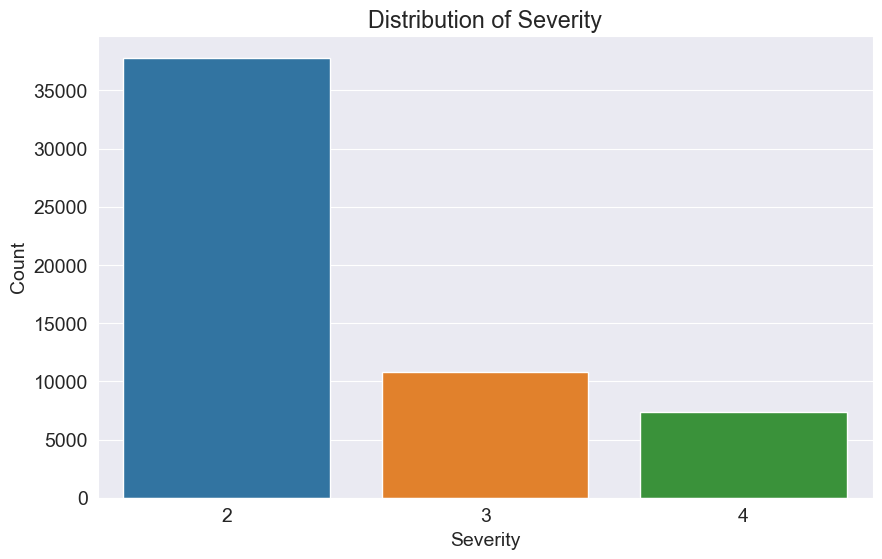

In [117]:
#check for the distribution of target variables

sns.countplot(x=target_input)

# Set the plot title and axis labels
plt.title('Distribution of Severity')
plt.xlabel('Severity')
plt.ylabel('Count')

# Show the plot
plt.show()

In [118]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 51.7 kB/s eta 0:00:00m eta 0:00:010:00:01


In [120]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [122]:
x_resampled, y_resampled = smote.fit_resample(train_arr, target_arr)

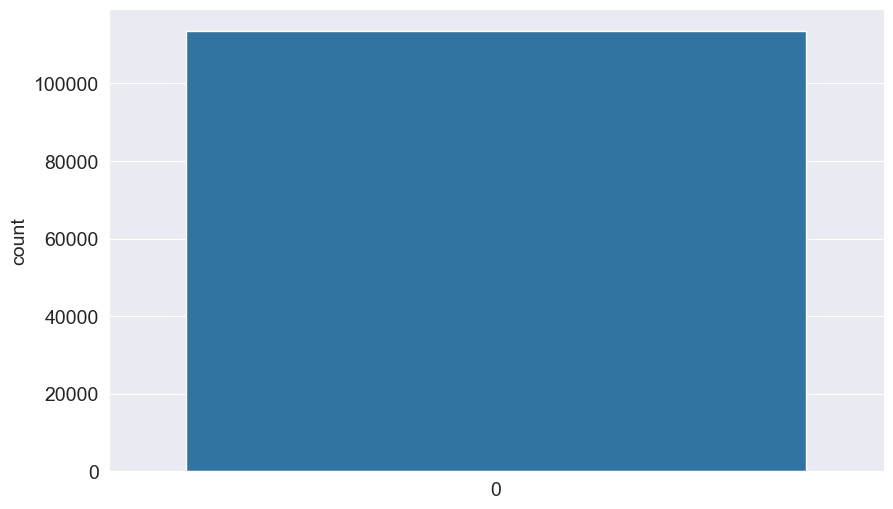

In [125]:
sns.countplot(y_resampled)
plt.show()

In [126]:
target_arr

array([2, 2, 3, ..., 2, 4, 2])

In [127]:
#check correlation

corr_matrix = dff.corr()

In [134]:
target_corr = corr_matrix['Severity'].sort_values(ascending=False)
target_corr

Severity             1.00
Distance(mi)         0.18
Start_Lng            0.11
Humidity(%)          0.07
Start_Lat            0.05
Stop                 0.04
Wind_Chill(F)        0.03
Amenity              0.01
Give_Way             0.01
Station              0.01
No_Exit              0.00
Traffic_Calming      0.00
Railway             -0.00
Bump                -0.00
Pressure(in)        -0.01
Crossing            -0.01
Traffic_Signal      -0.01
Precipitation(in)   -0.01
Wind_Speed(mph)     -0.02
Visibility(mi)      -0.03
Temperature(F)      -0.07
Junction            -0.07
Roundabout            NaN
Turning_Loop          NaN
Name: Severity, dtype: float64

In [132]:
selected_vars = target_corr[:int(len(target_corr)/2)].abs().index

In [133]:
selected_vars

Index(['Severity', 'Distance(mi)', 'Start_Lng', 'Humidity(%)', 'Start_Lat',
       'Stop', 'Wind_Chill(F)', 'Amenity', 'Give_Way', 'Station', 'No_Exit',
       'Traffic_Calming'],
      dtype='object')

In [161]:
x = train_inputs[selected_vars[1:]]
val = val_inputs[selected_vars[1:]]
test = test_inputs[selected_vars[1:]]

In [148]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 45077 to 24040
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Distance(mi)     56000 non-null  float64
 1   Start_Lng        56000 non-null  float64
 2   Humidity(%)      56000 non-null  float64
 3   Start_Lat        56000 non-null  float64
 4   Stop             56000 non-null  bool   
 5   Wind_Chill(F)    56000 non-null  float64
 6   Amenity          56000 non-null  bool   
 7   Give_Way         56000 non-null  bool   
 8   Station          56000 non-null  bool   
 9   No_Exit          56000 non-null  bool   
 10  Traffic_Calming  56000 non-null  bool   
dtypes: bool(6), float64(5)
memory usage: 2.9 MB


In [139]:
y = target_arr

In [149]:
numerical_cols = x.select_dtypes(np.number).columns.tolist()
categorical_cols = x.select_dtypes('bool').columns.tolist()

In [141]:
imputer.fit(x[numerical_cols])

SimpleImputer()

In [163]:
x[numerical_cols] = imputer.transform(x[numerical_cols])
val[numerical_cols] = imputer.transform(val[numerical_cols])
test[numerical_cols] = imputer.transform(test[numerical_cols])

In [144]:
scaler.fit(x[numerical_cols])

MinMaxScaler()

In [150]:
categorical_cols

['Stop', 'Amenity', 'Give_Way', 'Station', 'No_Exit', 'Traffic_Calming']

In [151]:
encoder.fit(x[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [152]:
encoder.categories_

[array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True])]

In [153]:
encoded_columns = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_columns)

['Stop_False', 'Stop_True', 'Amenity_False', 'Amenity_True', 'Give_Way_False', 'Give_Way_True', 'Station_False', 'Station_True', 'No_Exit_False', 'No_Exit_True', 'Traffic_Calming_False', 'Traffic_Calming_True']


In [164]:
x[encoded_columns]=encoder.transform(x[categorical_cols])
val[encoded_columns]=encoder.transform(val[categorical_cols])
test[encoded_columns]=encoder.transform(test[categorical_cols])

In [156]:
x

,Distance(mi),Start_Lng,Humidity(%),Start_Lat,Stop,Wind_Chill(F),Amenity,Give_Way,Station,No_Exit,Traffic_Calming,Stop_False,Stop_True,Amenity_False,Amenity_True,Give_Way_False,Give_Way_True,Station_False,Station_True,No_Exit_False,No_Exit_True,Traffic_Calming_False,Traffic_Calming_True
45077,0.00,0.64,1.00,0.74,False,0.51,False,False,True,False,False,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
42014,0.01,0.89,0.39,0.66,False,0.47,False,False,False,False,False,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
12875,0.00,0.48,0.45,0.33,False,0.53,False,False,False,False,False,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
98358,0.01,0.90,0.77,0.68,False,0.48,False,False,False,False,False,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
8315,0.00,0.12,0.61,0.33,False,0.48,False,False,False,False,False,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95956,0.01,0.16,0.20,0.42,False,0.48,False,False,False,False,False,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
17589,0.00,0.48,0.50,0.32,False,0.48,False,False,False,False,False,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
81269,0.01,0.83,0.80,0.57,False,0.48,False,False,False,False,False,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
50389,0.01,0.66,0.79,0.48,False,0.48,False,False,False,False,False,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00


In [157]:
model.fit(x, y)

RandomForestClassifier(class_weight={2: 5, 3: 3, 4: 7}, max_samples=0.9,
                       min_impurity_decrease=1e-05, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [168]:
model.score(x, y)

0.750875

In [169]:
model.score(val, val_arr1)

0.70075

In [170]:
model.score(test, test_arr1)

0.6956